# Q1

In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [161]:
df = pd.read_csv('heart.csv')

In [162]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [163]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [164]:
x = df.drop(columns = ['target'], axis = 1)
y = df['target']

In [165]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [166]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [167]:
model1 = LogisticRegression(penalty = 'l1', solver = 'liblinear') #lasso
model2 = LogisticRegression(penalty = 'l2') #ridge
model3 = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.5)
#L1 + L2 hybrid, l1_ratio = 0 -> L1(lasso) = 0%
#L1 + L2 hybrid, l1_ratio = 0.5 -> L1(lasso) = 50%, L2(ridge) = 50%
#L1 + L2 hybrid, l1_ratio = 1 -> L1(lasso) = 100%

#L2 (Ridge) = Gentle penalty (shrinks all features a bit)
#L1 (Lasso) = Aggressive penalty (eliminates weak features)
#ElasticNet = Balanced penalty (both shrinking and elimination)

In [168]:
model1.fit(x_train_scaled, y_train) #l1 only takes liblinear solver
model2.fit(x_train_scaled, y_train)
model3.fit(x_train_scaled, y_train) #elasticnet only takes saga solver and l1_ratio must be declared

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [169]:
y1_pred = model1.predict(x_test_scaled)
y2_pred = model2.predict(x_test_scaled)
y3_pred = model3.predict(x_test_scaled)

In [170]:
test_acc1 = accuracy_score(y_test, y1_pred)
train_acc1 = accuracy_score(y_train, model1.predict(x_train_scaled))
test_acc2 = accuracy_score(y_test, y2_pred)
train_acc2 = accuracy_score(y_train, model2.predict(x_train_scaled))
test_acc3 = accuracy_score(y_test, y3_pred)
train_acc3 = accuracy_score(y_train, model3.predict(x_train_scaled))
train_accuracies = [train_acc1, train_acc2, train_acc3]
test_accuracies = [test_acc1, test_acc2, test_acc3]


In [171]:
print(f"Train Accuracy Model L1: {train_acc1:.2f}, Test Accuracy Model L1: {test_acc1:.2f}")
print(f"L1 slope: {model1.coef_} \n L1 intercept :  {model1.intercept_}\n")
print(f"Train Accuracy Model L2: {train_acc2:.2f}, Test Accuracy Model L2: {test_acc2:.2f}")
print(f"L2 slope: {model2.coef_} \n L2 intercept :  {model2.intercept_}\n")
print(f"Train Accuracy Model Elastic Net: {train_acc3:.2f}, Test Accuracy Model Elastic Net: {test_acc3:.2f}")
print(f"elastic net slope: {model3.coef_} \n elastic net intercept :  {model3.intercept_}\n")


Train Accuracy Model L1: 0.87, Test Accuracy Model L1: 0.80
L1 slope: [[ 0.         -0.82545762  0.87650707 -0.31340015 -0.43971002 -0.05121965
   0.13144983  0.64755719 -0.4118725  -0.75987243  0.33519683 -0.840249
  -0.64778232]] 
 L1 intercept :  [-0.11237237]

Train Accuracy Model L2: 0.87, Test Accuracy Model L2: 0.80
L2 slope: [[-0.00673443 -0.83566545  0.88583501 -0.32005334 -0.44727634 -0.06268543
   0.14080389  0.65282635 -0.42023491 -0.7654063   0.34360461 -0.84752165
  -0.65685634]] 
 L2 intercept :  [-0.12874356]

Train Accuracy Model Elastic Net: 0.87, Test Accuracy Model Elastic Net: 0.80
elastic net slope: [[-0.00188965 -0.8300408   0.88221602 -0.31704599 -0.44402814 -0.05736754
   0.13644267  0.65172301 -0.41622502 -0.76392716  0.33935237 -0.84499165
  -0.65316704]] 
 elastic net intercept :  [-0.1270865]



In [172]:
#small gap between train and test accuracy indicates good fit. Model generalizes well

import matplotlib.pyplot as plt

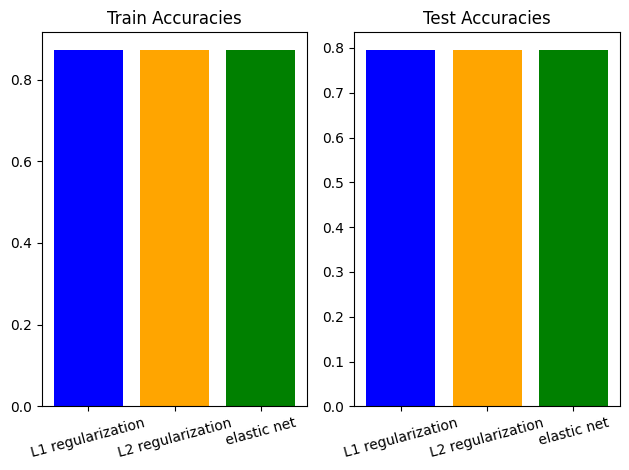

In [173]:
plt.subplot(1, 2, 1)
plt.bar(['L1 regularization', 'L2 regularization', 'elastic net'], train_accuracies, color = ['blue', 'orange', 'green'])
plt.title('Train Accuracies')
plt.xticks(rotation = 15)
plt.subplot(1, 2, 2)
plt.bar(['L1 regularization', 'L2 regularization', 'elastic net'], test_accuracies, color = ['blue', 'orange', 'green'])
plt.title('Test Accuracies')
plt.tight_layout()
plt.xticks(rotation = 15)
plt.show()

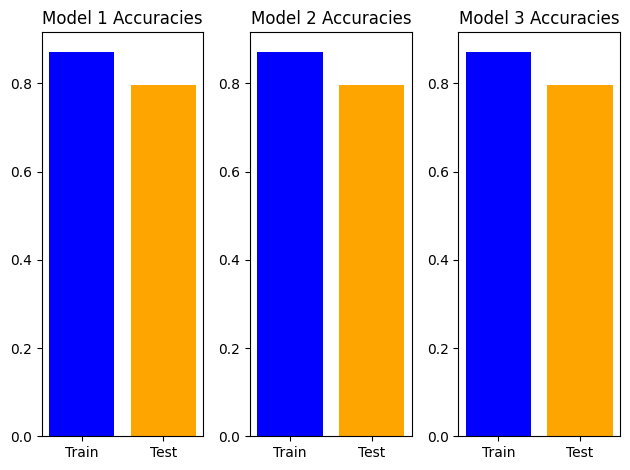

In [174]:
plt.subplot(1,3,1)
plt.bar(['Train', 'Test'], [train_acc1, test_acc1], color = ['blue', 'orange'])
plt.title('Model 1 Accuracies')
plt.subplot(1,3,2)
plt.bar(['Train', 'Test'], [train_acc2, test_acc2], color = ['blue', 'orange'])
plt.title('Model 2 Accuracies')
plt.subplot(1,3,3)
plt.bar(['Train', 'Test'], [train_acc3, test_acc3], color = ['blue', 'orange'])
plt.title('Model 3 Accuracies')
plt.tight_layout()
plt.show()

# Q2

In [175]:
from sklearn.datasets import load_iris

In [176]:
iris = load_iris()

In [177]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['target'] = iris.target


In [178]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [179]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [180]:
MLR1 = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
MLR2 = LogisticRegression(multi_class = 'multinomial', solver = 'liblinear')
MLR3 = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
MLR4 = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cholesky')
MLR5 = LogisticRegression(multi_class = 'multinomial', solver = 'sag')
MLR6 = LogisticRegression(multi_class = 'multinomial', solver = 'saga')

In [181]:
df.shape

(150, 5)

In [182]:
x = df.drop(columns = ['target'], axis = 1)
y = df['target']

In [183]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [184]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [185]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [186]:
MLRScaler = StandardScaler()
x_train_scaled = MLRScaler.fit_transform(x_train)
x_test_scaled = MLRScaler.transform(x_test)

In [187]:
MLR1.fit(x_train_scaled, y_train)
#MLR2.fit(x_train_scaled, y_train) liblinear solver does not support multinomial
MLR3.fit(x_train_scaled, y_train)
# MLR4.fit(x_train_scaled, y_train) newton-cholesky solver may not be available in some versions
MLR5.fit(x_train_scaled, y_train)
MLR6.fit(x_train_scaled, y_train)

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib

LogisticRegression(multi_class='multinomial', solver='saga')

In [188]:
lbfgs_pred = MLR1.predict(x_test_scaled)
newtoncg_pred = MLR3.predict(x_test_scaled)
sag_pred = MLR5.predict(x_test_scaled)
saga_pred = MLR6.predict(x_test_scaled)

In [189]:
results = []
solvers = ['lbfgs', 'newton-cg', 'sag', 'saga']
predictions = [lbfgs_pred, newtoncg_pred, sag_pred, saga_pred]
training_acc1 = accuracy_score(y_train, MLR1.predict(x_train_scaled))
training_acc3 = accuracy_score(y_train, MLR3.predict(x_train_scaled))
training_acc5 = accuracy_score(y_train, MLR5.predict(x_train_scaled))
training_acc6 = accuracy_score(y_train, MLR6.predict(x_train_scaled))
training_accs = [training_acc1, training_acc3, training_acc5, training_acc6]
for i in range(len(solvers)):
    results.append({
        'Solver': solvers[i],
        'Training Accuracy':training_accs[i],
        'Testing Accuracy':accuracy_score(y_test, predictions[i])
    })


In [190]:
results

[{'Solver': 'lbfgs',
  'Training Accuracy': 0.9666666666666667,
  'Testing Accuracy': 1.0},
 {'Solver': 'newton-cg',
  'Training Accuracy': 0.9666666666666667,
  'Testing Accuracy': 1.0},
 {'Solver': 'sag',
  'Training Accuracy': 0.9666666666666667,
  'Testing Accuracy': 1.0},
 {'Solver': 'saga',
  'Training Accuracy': 0.9666666666666667,
  'Testing Accuracy': 1.0}]

In [191]:
results = pd.DataFrame(results)

In [192]:
results

,Solver,Training Accuracy,Testing Accuracy
0,lbfgs,0.966667,1.0
1,newton-cg,0.966667,1.0
2,sag,0.966667,1.0
3,saga,0.966667,1.0


In [193]:
df1 = pd.read_csv('heart.csv')

In [194]:
x = df1.drop(columns = ['target'], axis = 1)
y = df1['target']

In [195]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [196]:
df1.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [197]:
heartScaler = StandardScaler()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)


In [198]:
x_train_scaled = heartScaler.fit_transform(x_train)
x_test_scaled = heartScaler.transform(x_test)

In [199]:
MLR1 = LogisticRegression( solver = 'lbfgs')
MLR2 = LogisticRegression( solver = 'liblinear')
MLR3 = LogisticRegression( solver = 'newton-cg')
MLR4 = LogisticRegression( solver = 'newton-cholesky')
MLR5 = LogisticRegression( solver = 'sag')
MLR6 = LogisticRegression( solver = 'saga')

MLR1.fit(x_train_scaled, y_train)
MLR2.fit(x_train_scaled, y_train) 
MLR3.fit(x_train_scaled, y_train)
MLR4.fit(x_train_scaled, y_train)
MLR5.fit(x_train_scaled, y_train)
MLR6.fit(x_train_scaled, y_train)

LogisticRegression(solver='saga')

In [200]:
results2 = []
solvers2 = ['lbfgs', 'liblinear', 'newton-cg','newton-cholesky' , 'sag', 'saga']


lbfgs_pred = MLR1.predict(x_test_scaled)
liblinear_pred = MLR2.predict(x_test_scaled)
newtoncg_pred = MLR3.predict(x_test_scaled)
newtoncholesky_pred = MLR4.predict(x_test_scaled)
sag_pred = MLR5.predict(x_test_scaled)
saga_pred = MLR6.predict(x_test_scaled)


predictions = [lbfgs_pred, liblinear_pred, newtoncg_pred, newtoncholesky_pred, sag_pred, saga_pred]
training_acc1 = accuracy_score(y_train, MLR1.predict(x_train_scaled))
training_acc2 = accuracy_score(y_train, MLR2.predict(x_train_scaled))
training_acc3 = accuracy_score(y_train, MLR3.predict(x_train_scaled))
training_acc4 = accuracy_score(y_train, MLR4.predict(x_train_scaled))
training_acc5 = accuracy_score(y_train, MLR5.predict(x_train_scaled))
training_acc6 = accuracy_score(y_train, MLR6.predict(x_train_scaled))
training_accs = [training_acc1, training_acc2, training_acc3, training_acc4, training_acc5, training_acc6]
for i in range(len(solvers2)):
    results2.append({
        'Solver': solvers2[i],
        'Training Accuracy':training_accs[i],
        'Testing Accuracy':accuracy_score(y_test, predictions[i])
    })


In [201]:
results2 = pd.DataFrame(results2)

In [202]:
results2

,Solver,Training Accuracy,Testing Accuracy
0,lbfgs,0.871951,0.795122
1,liblinear,0.871951,0.795122
2,newton-cg,0.871951,0.795122
3,newton-cholesky,0.871951,0.795122
4,sag,0.871951,0.795122
5,saga,0.871951,0.795122


In [203]:
results

,Solver,Training Accuracy,Testing Accuracy
0,lbfgs,0.966667,1.0
1,newton-cg,0.966667,1.0
2,sag,0.966667,1.0
3,saga,0.966667,1.0


In [204]:
# increasing the size of the dataset reduces the training and testing accuracies

# Q3

In [205]:
#MLP binary classification
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

In [206]:
iris = load_iris()

In [207]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [208]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [209]:
df['target'] = iris.target

In [210]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [211]:
num_classes = df['target'].unique().sum()

In [212]:
num_classes

np.int64(3)

In [213]:
model = Sequential()
model.add(Dense(units = 8, input_dim = 4, activation = 'relu'))
model.add(Dense(units = 4, activation = 'relu'))
model.add(Dense(units = num_classes, activation = 'softmax'))
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [214]:
x = df.drop(columns = ['target'], axis = 1)
y = df['target']


In [215]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [216]:
my_scaler = StandardScaler()
scaled_xTrain = my_scaler.fit_transform(x_train)
scaled_xTest = my_scaler.transform(x_test)

In [217]:
scaled_xTrain.shape

(120, 4)

In [218]:
y_train

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: target, Length: 120, dtype: int64

In [219]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [220]:
history = model.fit(x = scaled_xTrain, y = y_train_encoded, epochs = 20, batch_size=40, validation_data=(scaled_xTest, y_test_encoded))

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.3417 - loss: 1.1231 - val_accuracy: 0.3667 - val_loss: 1.1108
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2917 - loss: 1.1182 - val_accuracy: 0.4000 - val_loss: 1.1048
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3000 - loss: 1.1140 - val_accuracy: 0.4000 - val_loss: 1.0989
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3083 - loss: 1.1099 - val_accuracy: 0.4000 - val_loss: 1.0931
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3250 - loss: 1.1052 - val_accuracy: 0.4000 - val_loss: 1.0870
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3250 - loss: 1.1007 - val_accuracy: 0.4333 - val_loss: 1.0806
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3583 - loss: 1.0963 - val_accuracy: 0.4333 - val_loss: 1.0741
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3583 - loss: 1.0916 - val_accuracy: 0.4333 - val_loss: 1.0678


In [221]:
y_pred = model.predict(scaled_xTest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


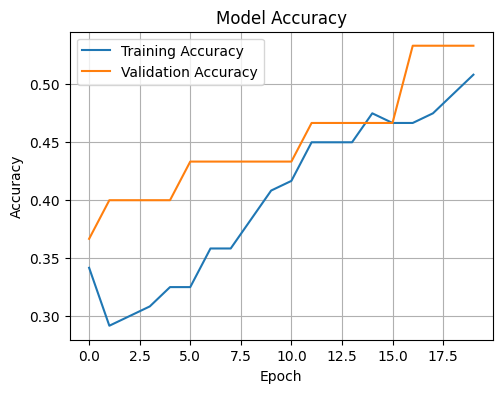

In [222]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


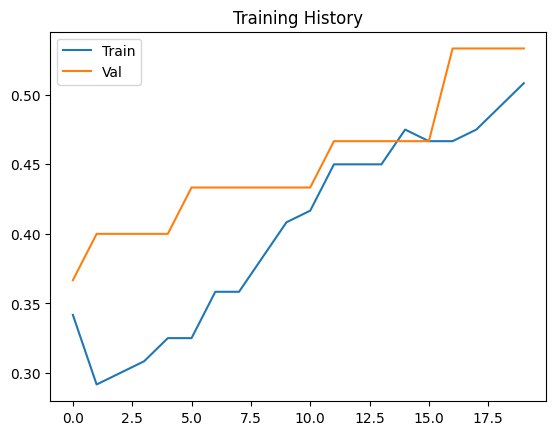

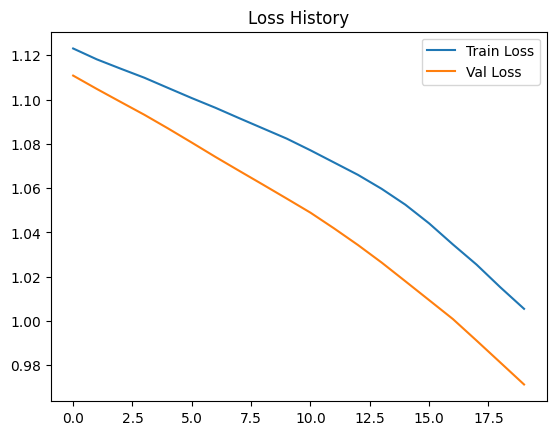

In [223]:
# CLASSIFICATION - Copy-Paste Ready
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, classification_report
import matplotlib.pyplot as plt

# METRICS
#accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)
#f1 = f1_score(y_test, y_pred)
#auc = roc_auc_score(y_test, y_pred_prob)
#cm = confusion_matrix(y_test, y_pred)
#print(classification_report(y_test, y_pred))

# PLOTS
# 1. Confusion Matrix
#ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

# 2. ROC Curve
#fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
#plt.plot(fpr, tpr, label=f'AUC={auc:.2f}')
#plt.plot([0,1], [0,1], 'r--')

# 3. Prediction Distribution
#plt.hist(y_pred_prob, bins=20, edgecolor='black')

# 4. Actual vs Predicted
#plt.scatter(range(len(y_test)), y_test, label='Actual')
#plt.scatter(range(len(y_pred)), y_pred, marker='x', label='Predicted')

# 5. Metrics Bar Chart
#plt.bar(['Accuracy', 'Precision', 'Recall', 'F1'], [accuracy, precision, recall, f1])

# 6. Training History (MLP only)
plt.title('Training History')
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.legend()
plt.show()

plt.title('Loss History')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

# Q4

In [224]:
from keras.models import Sequential
from keras.layers import Dense

from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()


In [225]:
df = pd.DataFrame(data = breast.data, columns = breast.feature_names)

In [226]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [227]:
df['target'] = breast.target

In [228]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [229]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [234]:
model = Sequential([
    Dense(units = 128, input_dim = breast.data.shape[1], activation = 'relu'),
    Dense(units = 64, activation = 'tanh'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'precision', 'recall'])

In [238]:
x = df.drop(columns = ['target'], axis = 1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)
history = model.fit(x = x_train_scaled, y = y_train, epochs = 50, batch_size=30, validation_data=(x_test_scaled, y_test))

Epoch 1/50


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9802 - loss: 0.0800 - precision: 0.9826 - recall: 0.9860 - val_accuracy: 0.9737 - val_loss: 0.0651 - val_precision: 0.9857 - val_recall: 0.9718
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9802 - loss: 0.0646 - precision: 0.9860 - recall: 0.9825 - val_accuracy: 0.9649 - val_loss: 0.0741 - val_precision: 0.9855 - val_recall: 0.9577
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9868 - loss: 0.0542 - precision: 0.9861 - recall: 0.9930 - val_accuracy: 0.9561 - val_loss: 0.0665 - val_precision: 0.9714 - val_recall: 0.9577
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9868 - loss: 0.0462 - precision: 0.9895 - recall: 0.9895 - val_accuracy: 0.9737 - val_loss: 0.0674 - val_precision: 0.9722 - val_recall: 0.9859
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9912 - loss: 0.0397 - precision: 0.9896 - recall: 0.9965 - val_accuracy: 0.9737 - val_loss: 0.0634 - val_precisi

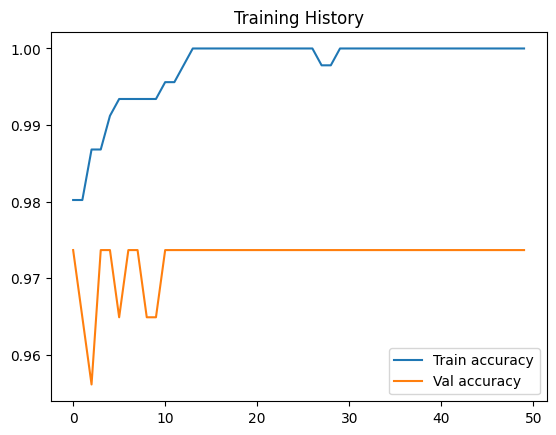

In [241]:
plt.title('Training History')
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend()
plt.show()


# Q5

In [242]:
df = pd.read_csv('WineQT.csv')

In [243]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [256]:
df.shape

(1143, 13)

In [245]:
df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [248]:
x = df.drop(columns = ['quality'], axis = 1)
y = df['quality']

In [249]:
from keras.utils import to_categorical

In [ ]:
y_encoded = to_categorical(y)

In [251]:
x_train, x_test, y_train_encoded, y_test_encoded = train_test_split(x, y_encoded, test_size = 0.2, random_state = 42)

In [252]:
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [253]:
model = Sequential([
    Dense(units = 64, input_dim = x_train.shape[1], activation = 'relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = y_encoded.shape[1], activation = 'softmax')
])

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [254]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'precision', 'recall'])

In [259]:
history = model.fit(x = x, y = y_encoded, epochs = 50, batch_size=150, validation_data=(x_test_scaled, y_test_encoded))

Epoch 1/50


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5529 - loss: 0.9972 - precision: 0.6304 - recall: 0.3955 - val_accuracy: 0.4760 - val_loss: 1.9806 - val_precision: 0.4934 - val_recall: 0.3275
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5731 - loss: 0.9733 - precision: 0.6629 - recall: 0.3561 - val_accuracy: 0.4760 - val_loss: 1.9838 - val_precision: 0.4935 - val_recall: 0.3319
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5451 - loss: 0.9984 - precision: 0.5887 - recall: 0.3920 - val_accuracy: 0.4760 - val_loss: 1.9871 - val_precision: 0.4935 - val_recall: 0.3319
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5617 - loss: 0.9803 - precision: 0.6234 - recall: 0.3867 - val_accuracy: 0.4760 - val_loss: 1.9924 - val_precision: 0.4968 - val_recall: 0.3362
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5424 - loss: 0.9916 - precision: 0.6144 - recall: 0.3430 - val_accuracy: 0.4760 - val_loss: 1.9948 - val_precision: 0.493

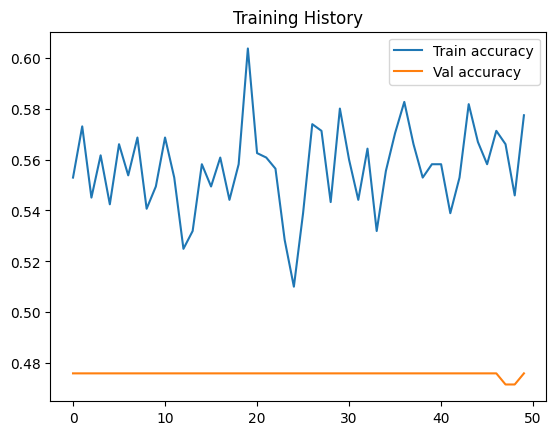

In [262]:
plt.title('Training History')
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend()
plt.show()

In [263]:
df = pd.read_csv('data.csv')


In [264]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [270]:
df = pd.get_dummies(data = df, drop_first = True)

In [271]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,False,False,False,False,False,False,False,False,False,False
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,False,False,False,False,False,False,False,False,False,False
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,False,False,False,False,False,False,False,False,False,False
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,False,False,False,False,False,False,False,False,False,False
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,False,False,False,False,False,False,False,False,False,False
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,False,False,False,False,False,False,False,False,False,False
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,False,False,False,False,False,False,False,False,False,False
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,False,False,False,False,True,False,False,False,False,False


In [267]:
x = df.drop(columns = ['city'], axis = 1)
y = df['city']

In [268]:
y.value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Kirkland                187
Issaquah                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
Tukwila                  29
SeaTac                   29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Fall City                11
Medina                   11
Black Diamond             9
Ravensdale                7
Pacific        

ValueError: invalid literal for int() with base 10: 'Shoreline'